In [1]:
import utils
import models
import PreciseSolutions

import numpy as np
import matplotlib.pyplot as plt

# Описание начальных условий

## Разрывное НУ

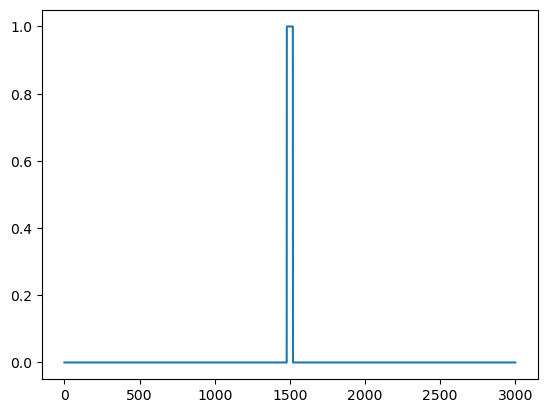

In [2]:
def impuls(x):
    if x < 1480 or x > 1520:
        return 0
    else:
        return 1

x = np.linspace(0, 3000, 3001)
y = np.array([impuls(xx) for xx in x])

plt.plot(x, y);

## Непрерывное НУ

(1400.0, 1600.0)

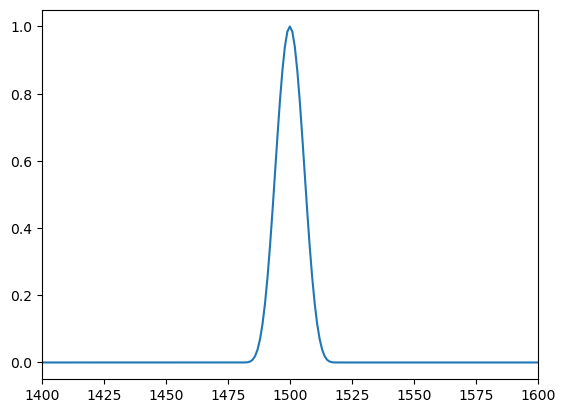

In [3]:
def halfsinus(x):
    m = 5
    if x < 1480 or x > 1520:
        return 0
    else:
        return np.sin(((x - 1480) * np.pi) / 40) ** m

x = np.linspace(0, 3000, 3001)
y = np.array([halfsinus(xx) for xx in x])

plt.plot(x, y);
plt.xlim(1400, 1600)

# Параметры задачи

In [4]:
TOTAL_TIME = 100
SPEED = 1

XLEFT = 0
XRIGHT = 3000

# Конкретный пример на одной сетке

In [5]:
mesh1 = models.Mesh(XLEFT, XRIGHT, N=3001)

In [6]:
def uniform_speed(mesh, U):
    return np.ones_like(mesh.xnodes) * SPEED

def zero_rightfunc(mesh, t, U):
    return np.zeros_like(mesh.xnodes)

In [7]:
task_params = models.TaskParams(halfsinus, uniform_speed, zero_rightfunc)

In [8]:
U_num_solution, time_steps = utils.main_runner(
    task_params, mesh1, Cu=1.0, total_time=TOTAL_TIME,
    time_step_method="Euler-1", space_deriv_approx_method="Backward", N_iter_max=int(1e5))

  0%|          | 100/100000 [00:00<00:17, 5637.13it/s]


In [9]:
U_prec_solution = PreciseSolutions.transport_eq_solution(task_params.init_cond, mesh1, SPEED, TOTAL_TIME)

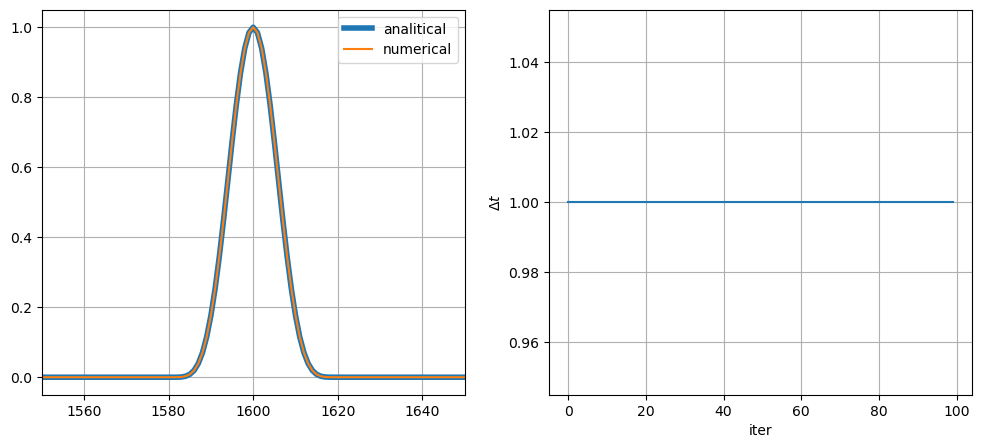

In [10]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

ax[0].plot(mesh1.xnodes, U_prec_solution, linewidth=4, label="analitical")
ax[0].plot(mesh1.xnodes, U_num_solution, label="numerical")

ax[0].legend()
ax[0].set_xlim(1550, 1650)
ax[0].grid()


ax[1].plot(time_steps)
ax[1].grid()
ax[1].set_xlabel("iter")
ax[1].set_ylabel("$\Delta t$")

plt.show()

# Исследование сходимости

In [11]:
TOTAL_TIME = 100
SPEED = 1

XLEFT = 0
XRIGHT = 3000

In [12]:
mesh2 = models.Mesh(XLEFT, XRIGHT, N=3001)
mesh1 = mesh2.get_twice_grid()
mesh0 = mesh1.get_twice_grid()
mesh00 = mesh0.get_twice_grid()

meshes_kw = {
    "mesh2" : mesh2,
    "mesh1" : mesh1,
    "mesh0" : mesh0,
    "mesh00" : mesh00,
}

In [13]:
Cu = 0.5
N_iter_max = int(1e10)

task_params = models.TaskParams(halfsinus, uniform_speed, zero_rightfunc)

analitical_solutions = {}
for mesh_name, mesh in meshes_kw.items():
    analitical_solutions[mesh_name] = PreciseSolutions.transport_eq_solution(task_params.init_cond, 
                                                                             mesh, 
                                                                             SPEED, 
                                                                             TOTAL_TIME)

In [20]:
time_step_methods_list = []
time_step_methods_list += ["Euler-1"]
time_step_methods_list += ["Euler-2"]
time_step_methods_list += ["Hoin"]
time_step_methods_list += ["RK-6"]
time_step_methods_list += ["RK-7"]

space_deriv_approx_methods_list = []
# space_deriv_approx_methods_list += ["Forward"]
space_deriv_approx_methods_list += ["Backward"]
space_deriv_approx_methods_list += ["Upwind2"]
space_deriv_approx_methods_list += ["Upwind3"]
space_deriv_approx_methods_list += ["Upwind5"]
space_deriv_approx_methods_list += ["CD2"]
space_deriv_approx_methods_list += ["CD4"]
space_deriv_approx_methods_list += ["CD6"]

mesh_list = []
mesh_list += ["mesh2"]
mesh_list += ["mesh1"]
mesh_list += ["mesh0"]
# mesh_list += ["mesh00"]

In [21]:
solutions_kw = dict()
for time_step_method in time_step_methods_list:
    for space_deriv_approx_method in space_deriv_approx_methods_list:
        print(f"{time_step_method} + {space_deriv_approx_method}".center(40, "."))
        for mesh_name in mesh_list:
            print(f"\t{mesh_name}:")
            mesh = meshes_kw[mesh_name]
            U_num_solution, time_steps = utils.main_runner(
                task_params, mesh, Cu, TOTAL_TIME, time_step_method, 
                space_deriv_approx_method, N_iter_max)
            solutions_kw[(time_step_method, space_deriv_approx_method, mesh_name)] = U_num_solution

...........Euler-1 + Backward...........
	mesh2:


  0%|          | 200/10000000000 [00:00<455:12:38, 6102.18it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<513:53:16, 5405.41it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<772:26:11, 3596.12it/s]


...........Euler-1 + Upwind2............
	mesh2:


  0%|          | 200/10000000000 [00:00<542:58:54, 5115.78it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<585:01:40, 4748.11it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<681:51:58, 4073.79it/s]


...........Euler-1 + Upwind3............
	mesh2:


  0%|          | 200/10000000000 [00:00<449:41:14, 6177.13it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<601:13:31, 4620.19it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<830:21:43, 3345.26it/s]


...........Euler-1 + Upwind5............
	mesh2:


  0%|          | 200/10000000000 [00:00<576:02:44, 4822.15it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<727:01:09, 3820.78it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<872:50:49, 3182.43it/s]


.............Euler-1 + CD2..............
	mesh2:


  0%|          | 200/10000000000 [00:00<471:29:09, 5891.54it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<622:25:23, 4462.84it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<797:32:35, 3482.92it/s]


.............Euler-1 + CD4..............
	mesh2:


  0%|          | 200/10000000000 [00:00<496:07:09, 5599.01it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<584:09:07, 4755.23it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<966:44:51, 2873.32it/s] 


.............Euler-1 + CD6..............
	mesh2:


  0%|          | 200/10000000000 [00:00<590:51:50, 4701.21it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<752:26:02, 3691.72it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<980:28:23, 2833.10it/s] 


...........Euler-2 + Backward...........
	mesh2:


  0%|          | 200/10000000000 [00:00<870:49:25, 3189.83it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1066:33:31, 2604.43it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<1424:06:58, 1950.53it/s]


...........Euler-2 + Upwind2............
	mesh2:


  0%|          | 200/10000000000 [00:00<974:34:20, 2850.25it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1138:49:04, 2439.18it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<1632:43:06, 1701.32it/s]


...........Euler-2 + Upwind3............
	mesh2:


  0%|          | 200/10000000000 [00:00<1006:11:45, 2760.67it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1281:05:44, 2168.28it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<1405:19:39, 1976.61it/s]


...........Euler-2 + Upwind5............
	mesh2:


  0%|          | 200/10000000000 [00:00<1087:06:09, 2555.21it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1367:35:55, 2031.14it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<1763:51:24, 1574.83it/s]


.............Euler-2 + CD2..............
	mesh2:


  0%|          | 200/10000000000 [00:00<757:18:48, 3667.94it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1128:17:51, 2461.92it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<1494:52:13, 1858.21it/s]


.............Euler-2 + CD4..............
	mesh2:


  0%|          | 200/10000000000 [00:00<960:28:56, 2892.06it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1226:11:53, 2265.36it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<1586:13:30, 1751.19it/s]


.............Euler-2 + CD6..............
	mesh2:


  0%|          | 200/10000000000 [00:00<1165:24:11, 2383.53it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1230:57:42, 2256.59it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<1716:39:56, 1618.12it/s]


............Hoin + Backward.............
	mesh2:


  0%|          | 200/10000000000 [00:00<1153:14:02, 2408.69it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1742:27:02, 1594.18it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<2212:39:41, 1255.40it/s]


.............Hoin + Upwind2.............
	mesh2:


  0%|          | 200/10000000000 [00:00<1247:10:27, 2227.26it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1608:38:35, 1726.78it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<2274:56:54, 1221.03it/s]


.............Hoin + Upwind3.............
	mesh2:


  0%|          | 200/10000000000 [00:00<1333:35:51, 2082.92it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1587:07:27, 1750.20it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<2349:53:38, 1182.09it/s]


.............Hoin + Upwind5.............
	mesh2:


  0%|          | 200/10000000000 [00:00<1460:13:51, 1902.29it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1884:27:13, 1474.05it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<2692:19:15, 1031.74it/s]


...............Hoin + CD2...............
	mesh2:


  0%|          | 200/10000000000 [00:00<1196:45:07, 2321.10it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1681:46:47, 1651.69it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<2400:06:59, 1157.35it/s]


...............Hoin + CD4...............
	mesh2:


  0%|          | 200/10000000000 [00:00<1668:06:43, 1665.22it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<1881:37:15, 1476.27it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<2690:30:04, 1032.44it/s]


...............Hoin + CD6...............
	mesh2:


  0%|          | 200/10000000000 [00:00<1717:42:11, 1617.15it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<2228:32:41, 1246.45it/s]


	mesh0:


  0%|          | 800/10000000000 [00:00<2925:00:56, 949.66it/s]


............RK-6 + Backward.............
	mesh2:


  0%|          | 200/10000000000 [00:00<2937:12:27, 945.72it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<4021:36:10, 690.71it/s]


	mesh0:


  0%|          | 800/10000000000 [00:01<6023:10:22, 461.18it/s]


.............RK-6 + Upwind2.............
	mesh2:


  0%|          | 200/10000000000 [00:00<3537:07:06, 785.32it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<4335:35:49, 640.69it/s]


	mesh0:


  0%|          | 800/10000000000 [00:01<6690:18:37, 415.19it/s]


.............RK-6 + Upwind3.............
	mesh2:


  0%|          | 200/10000000000 [00:00<3142:34:19, 883.92it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<4133:05:06, 672.08it/s]


	mesh0:


  0%|          | 800/10000000000 [00:01<6838:09:11, 406.22it/s]


.............RK-6 + Upwind5.............
	mesh2:


  0%|          | 200/10000000000 [00:00<3940:17:26, 704.97it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<4892:50:32, 567.72it/s]


	mesh0:


  0%|          | 800/10000000000 [00:02<7361:21:09, 377.35it/s]


...............RK-6 + CD2...............
	mesh2:


  0%|          | 200/10000000000 [00:00<3149:05:43, 882.09it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<4155:15:35, 668.50it/s]


	mesh0:


  0%|          | 800/10000000000 [00:01<6621:11:05, 419.53it/s]


...............RK-6 + CD4...............
	mesh2:


  0%|          | 200/10000000000 [00:00<3667:58:01, 757.31it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<4660:37:04, 596.01it/s]


	mesh0:


  0%|          | 800/10000000000 [00:02<7191:49:04, 386.24it/s]


...............RK-6 + CD6...............
	mesh2:


  0%|          | 200/10000000000 [00:00<3890:22:18, 714.01it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<4691:52:25, 592.04it/s]


	mesh0:


  0%|          | 800/10000000000 [00:01<6859:46:40, 404.94it/s]


............RK-7 + Backward.............
	mesh2:


  0%|          | 200/10000000000 [00:00<4015:47:12, 691.71it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<5053:12:43, 549.71it/s]


	mesh0:


  0%|          | 800/10000000000 [00:02<7968:36:26, 348.59it/s]


.............RK-7 + Upwind2.............
	mesh2:


  0%|          | 200/10000000000 [00:00<4464:48:41, 622.15it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<5463:49:48, 508.39it/s]


	mesh0:


  0%|          | 800/10000000000 [00:02<8780:48:41, 316.35it/s]


.............RK-7 + Upwind3.............
	mesh2:


  0%|          | 200/10000000000 [00:00<4175:25:16, 665.27it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<5451:38:03, 509.53it/s]


	mesh0:


  0%|          | 800/10000000000 [00:02<8907:04:50, 311.86it/s] 


.............RK-7 + Upwind5.............
	mesh2:


  0%|          | 200/10000000000 [00:00<4937:53:49, 562.54it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<6745:15:31, 411.81it/s]


	mesh0:


  0%|          | 800/10000000000 [00:02<9350:12:52, 297.08it/s] 


...............RK-7 + CD2...............
	mesh2:


  0%|          | 200/10000000000 [00:00<4017:27:44, 691.43it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<5468:11:22, 507.99it/s]


	mesh0:


  0%|          | 800/10000000000 [00:02<9086:55:42, 305.69it/s] 


...............RK-7 + CD4...............
	mesh2:


  0%|          | 200/10000000000 [00:00<4650:57:48, 597.25it/s]


	mesh1:


  0%|          | 400/10000000000 [00:00<6231:09:31, 445.79it/s]


	mesh0:


  0%|          | 800/10000000000 [00:02<8740:07:32, 317.82it/s]


...............RK-7 + CD6...............
	mesh2:


  0%|          | 200/10000000000 [00:00<5396:10:38, 514.77it/s]


	mesh1:


  0%|          | 400/10000000000 [00:01<7558:41:47, 367.49it/s]


	mesh0:


  0%|          | 800/10000000000 [00:03<10836:15:30, 256.34it/s]


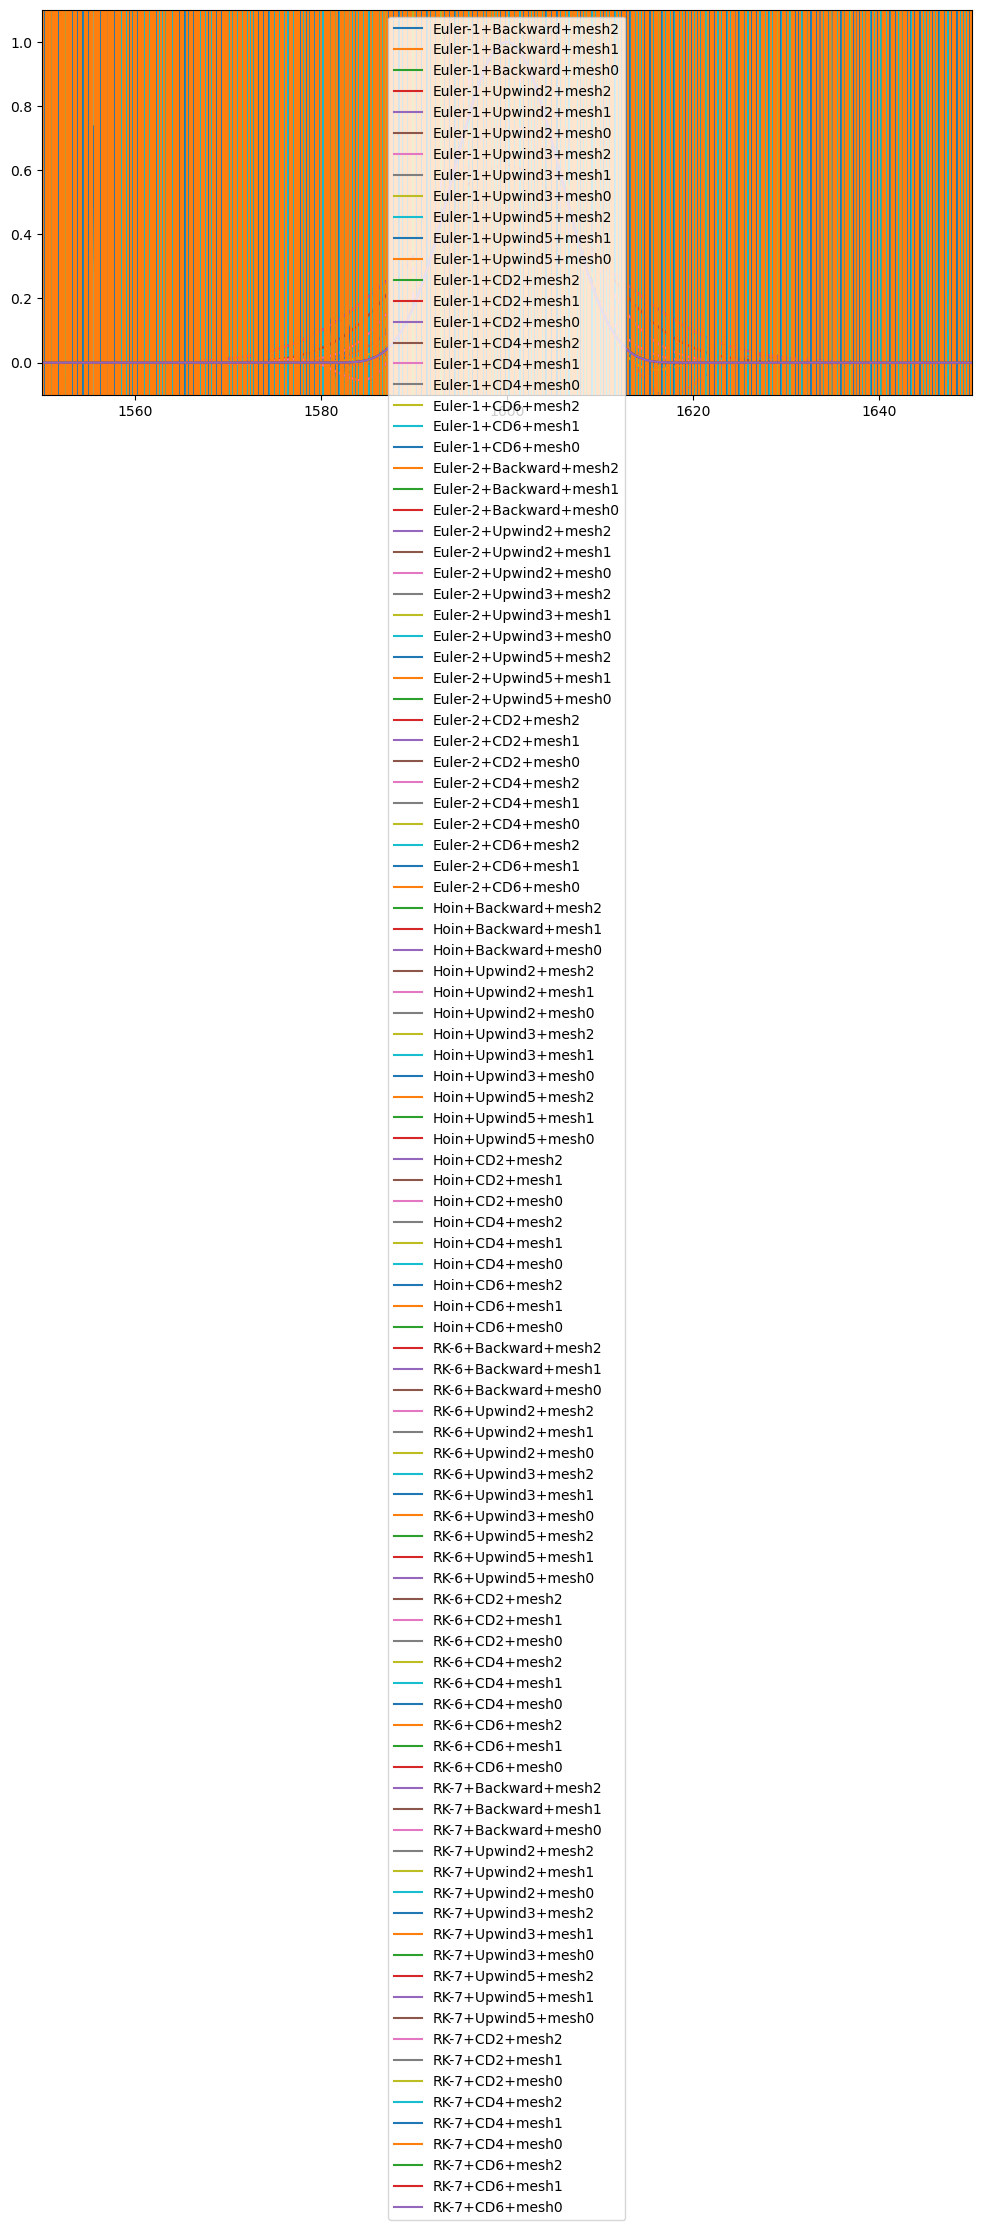

In [22]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 5))

for time_step_method in time_step_methods_list:
    for space_deriv_approx_method in space_deriv_approx_methods_list:
        for mesh_name in mesh_list:
            mesh = meshes_kw[mesh_name]
            U_num = solutions_kw[(time_step_method, space_deriv_approx_method, mesh_name)]
            label = f"{time_step_method}+{space_deriv_approx_method}+{mesh_name}"
            ax.plot(mesh.xnodes, U_num, label=label)

ax.legend()
ax.set_xlim(1550, 1650)
ax.set_ylim(-0.1, 1.1)
ax.grid()
plt.show()

In [23]:
# вычисление ошибок
errors_kw = {}
for time_step_method in time_step_methods_list:
    for space_deriv_approx_method in space_deriv_approx_methods_list:
        errors_kw[(time_step_method, space_deriv_approx_method)] = np.zeros((2, len(mesh_list)))
        for i, mesh_name in enumerate(mesh_list):
            mesh = meshes_kw[mesh_name]
            U_num = solutions_kw[(time_step_method, space_deriv_approx_method, mesh_name)]
            error = utils.get_error(U_num, analitical_solutions[mesh_name], mesh)
            
            errors_kw[(time_step_method, space_deriv_approx_method)][0, i] = mesh.dx
            errors_kw[(time_step_method, space_deriv_approx_method)][1, i] = error

/home/ruslan/Рабочий стол/ФИЗТЕХ/computational_aerodynamics/OneDimensionalProblems/Finite_difference_method/utils.py:129: RuntimeWarning: overflow encountered in square
  difs2 = difs**2


In [24]:
# вычисление порядков сходимости
orders_grid_conv = {}
for time_step_method in time_step_methods_list:
    for space_deriv_approx_method in space_deriv_approx_methods_list:
        err1, err0 = errors_kw[(time_step_method, space_deriv_approx_method)][1, -2:]
        order_grid_conv = utils.grid_conv_by_true(err1, err0)
        orders_grid_conv[(time_step_method, space_deriv_approx_method)] = order_grid_conv

/home/ruslan/Рабочий стол/ФИЗТЕХ/computational_aerodynamics/OneDimensionalProblems/Finite_difference_method/utils.py:151: RuntimeWarning: divide by zero encountered in log2
  ord_conv = np.log2(k)


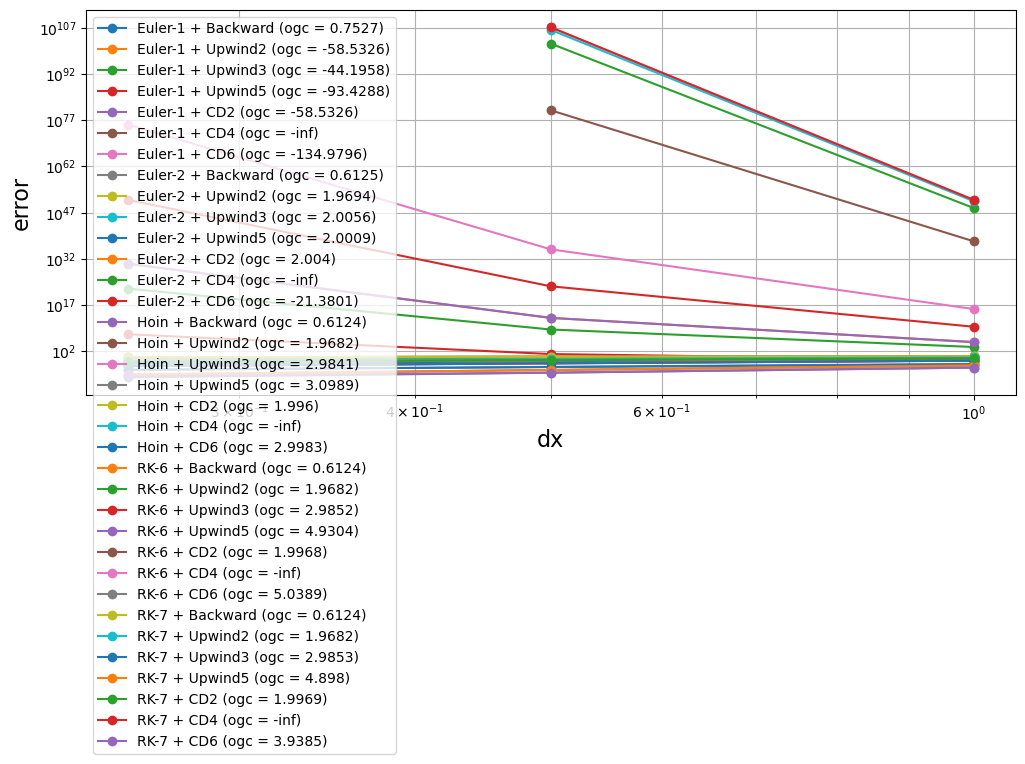

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 5))

for time_step_method in time_step_methods_list:
    for space_deriv_approx_method in space_deriv_approx_methods_list:
        dx_list = errors_kw[(time_step_method, space_deriv_approx_method)][0, :]
        err_list = errors_kw[(time_step_method, space_deriv_approx_method)][1, :]
        order_grid_conv = orders_grid_conv[(time_step_method, space_deriv_approx_method)]
        
        ax.plot(dx_list, err_list, '-o', label=f"{time_step_method} + {space_deriv_approx_method} (ogc = {round(order_grid_conv, 4)})")
        
        

ax.set_xlabel("dx", size=16)
ax.set_ylabel("error", size=16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(which="Both")
ax.legend()
plt.show()